<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Arbitrary_Value_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arbitrary Value Imputation :--

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [43]:
df=pd.read_csv('titanic_toy.csv')

In [44]:
df.sample(5)

,Age,Fare,Family,Survived
127,24.0,7.1417,0,1
91,20.0,7.8542,0,0
200,28.0,9.5000,0,0
752,33.0,9.5000,0,0
43,3.0,41.5792,3,1


In [45]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [46]:
df.shape

(891, 4)

In [47]:
#lets see the %age of missing value :
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=2)

In [49]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [50]:
X_train.sample(5)

,Age,Fare,Family
269,35.0,135.6333,0
63,4.0,27.9000,5
459,NaN,7.7500,0
690,31.0,57.0000,1
519,32.0,7.8958,0


In [51]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [52]:
X_train["Age_99"]=X_train['Age'].fillna(99)
X_train["Age_minus"]=X_train['Age'].fillna(-1)

X_train["Fare_999"]=X_train['Fare'].fillna(999)
X_train["Fare_minus"]=X_train['Fare'].fillna(-1)

In [53]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
336,29.0,NaN,1,29.0,29.0,999.0000,-1.0000
856,45.0,164.8667,2,45.0,45.0,164.8667,164.8667
650,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
353,25.0,17.8000,1,25.0,25.0,17.8000,17.8000
121,NaN,8.0500,0,99.0,-1.0,8.0500,8.0500


##See the vaiances of original and imputed variables :-

In [54]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_99'].var())
print('Age Variance after mean imputation: ', X_train['Age_minus'].var())

print('\nOriginal Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_999'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_minus'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  951.7275570187188
Age Variance after mean imputation:  318.0896202624488

Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  47219.202652176304
Fare Variance after mean imputation:  2378.5676784883494


##Plotting the kde plot of original and imputed age variable :-

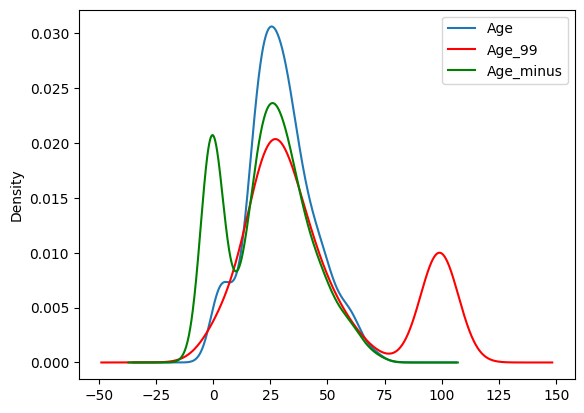

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Plotting the kde plot of original and imputed Fare variable :-

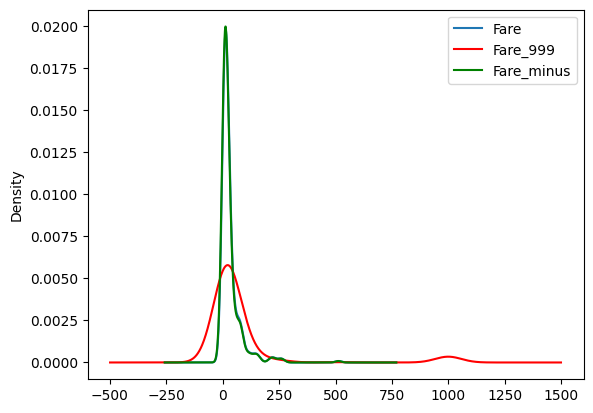

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [57]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [58]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus,Fare_999,Fare_minus
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


##Box plot of original and imputed age variables :-

<Axes: >

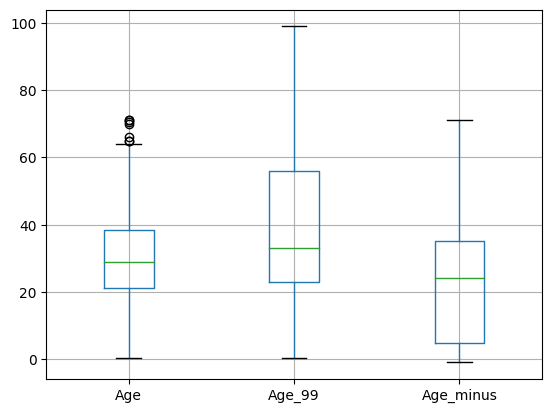

In [59]:
X_train[['Age', 'Age_99', 'Age_minus']].boxplot()

##Box plot of original and imputed Fare variables :-

<Axes: >

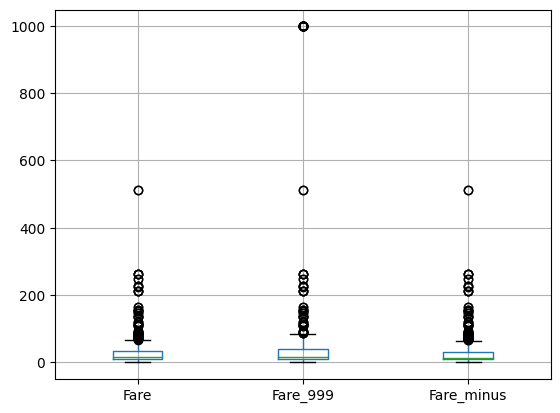

In [60]:
X_train[['Fare', 'Fare_999', 'Fare_minus']].boxplot()

#Using scikit-learn :-

In [61]:
X_train ,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=2)

In [62]:
Imputer1=SimpleImputer(strategy='constant',fill_value=99)
Imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [63]:
trf=ColumnTransformer([
    ('impute_age',Imputer1,['Age']),
    ('impute_fare',Imputer2,['Fare'])
],remainder='passthrough')

In [64]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('impute_fare',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [65]:
trf.named_transformers_['impute_age'].statistics_

array([99.])

In [66]:
trf.named_transformers_['impute_fare'].statistics_

array([999.])

In [67]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [68]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [69]:
X_train=pd.DataFrame(X_train,columns=df.drop('Survived',axis=1).columns)
X_test=pd.DataFrame(X_test,columns=df.drop('Survived',axis=1).columns)

In [70]:
X_train.sample(5)

,Age,Fare,Family
202,2.00,151.5500,3.0
259,24.00,13.0000,0.0
324,9.00,46.9000,7.0
563,21.00,7.2500,0.0
615,0.42,8.5167,1.0
